In [20]:
!pip install plotly


Description:

pandas is used for data handling and analysis.

matplotlib and seaborn are used for creating static plots.

plotly.express is used for interactive graphs.

The last two lines set figure size and plot style for better visualization.

In [54]:
df = pd.read_csv("movie_ratings.csv (1).csv")
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Description:

Loads your movie ratings CSV file into a DataFrame called df.

df.head() shows the first 5 rows of data.

This helps check that columns like Movie, Genre, IMDB_Rating exist.

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


In [23]:
# Fill missing ratings with mean
df['IMDB_Rating'].fillna(df['IMDB_Rating'].mean(), inplace=True)
df['Rotten_Tomatoes_Rating'].fillna(df['Rotten_Tomatoes_Rating'].mean(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)


/tmp/ipython-input-4208438415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IMDB_Rating'].fillna(df['IMDB_Rating'].mean(), inplace=True)
/tmp/ipython-input-4208438415.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

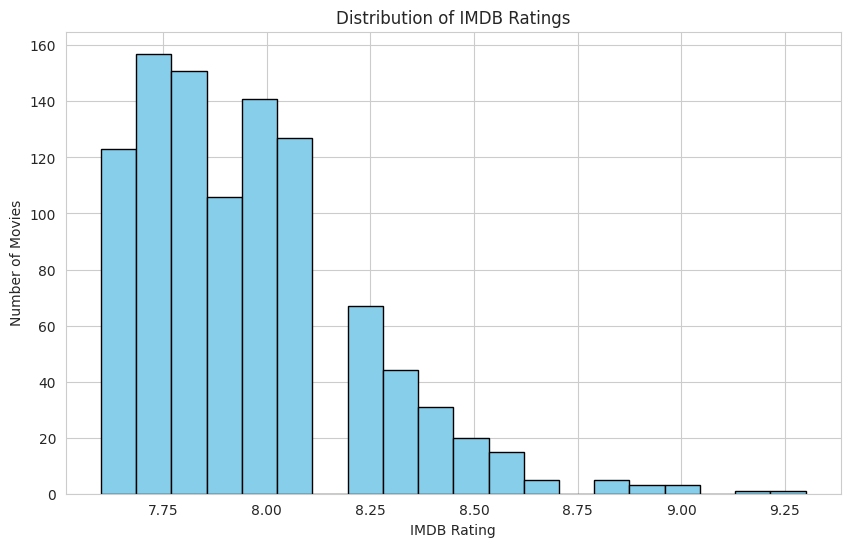

In [55]:
plt.hist(df['IMDB_Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of IMDB Ratings")
plt.xlabel("IMDB Rating")
plt.ylabel("Number of Movies")
plt.show()


Description:

Shows the distribution of IMDB ratings across all movies.

bins=20 divides the rating range into 20 intervals.

Helps identify most common rating ranges and how ratings are spread.

In [24]:
top_movies = df.sort_values(by='IMDB_Rating', ascending=False).head(10)
top_movies[['Movie','Genre','IMDB_Rating']]


,Movie,Genre,IMDB_Rating
4,Movie E,Action,8.7
0,Movie A,Action,8.2
8,Movie I,Action,8.1
5,Movie F,Drama,7.8
9,Movie J,Drama,7.6
1,Movie B,Drama,7.5
2,Movie C,Comedy,6.9
6,Movie G,Comedy,6.5
7,Movie H,Horror,5.9
3,Movie D,Horror,5.8


Description:

Shows median, quartiles, and outliers of ratings.

IMDB_Rating and Rotten_Tomatoes_Rating are compared side by side.

Helps understand rating variation and detect any extreme values.

In [25]:
fig = px.histogram(df, x="IMDB_Rating", nbins=20,
                   title="Distribution of IMDB Ratings",
                   color="Genre",
                   marginal="box")  # Adds mini box plot
fig.show()


Description:

Groups movies by Genre and calculates average IMDB rating for each genre.

Bar chart shows which genres are rated higher.

Useful for comparing movie ratings across different genres.

In [26]:
fig = px.box(df, y=["IMDB_Rating","Rotten_Tomatoes_Rating"],
             title="Box Plot of Movie Ratings",
             points="all", # Shows all data points
             color_discrete_sequence=["skyblue","orange"])
fig.show()


Description:

Plots each movie as a point on IMDB vs Rotten Tomatoes rating axes.

Color (hue='Genre') indicates movie genre.

Helps identify correlation between rating systems and genre differences.

In [27]:
genre_ratings = df.groupby("Genre")["IMDB_Rating"].mean().reset_index()
fig = px.bar(genre_ratings, x="Genre", y="IMDB_Rating",
             color="IMDB_Rating",
             title="Average IMDB Rating by Genre",
             color_continuous_scale="Viridis")
fig.show()


Description:

Same as previous scatter, but interactive.

Hover over points to see movie name and year.

Point size reflects IMDB_Rating.

Helps explore data dynamically, zoom in/out, and highlight movies.

In [28]:
fig = px.scatter(df, x="IMDB_Rating", y="Rotten_Tomatoes_Rating",
                 color="Genre",
                 hover_data=['Movie','Year'],
                 size="IMDB_Rating",
                 title="IMDB vs Rotten Tomatoes Ratings")
fig.show()


In [29]:
fig = go.Figure(data=[go.Table(
    header=dict(values=["Movie", "Genre", "IMDB Rating"],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[top_movies['Movie'], top_movies['Genre'], top_movies['IMDB_Rating']],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title="Top 10 Movies by IMDB Rating")
fig.show()


In [30]:
from plotly.subplots import make_subplots

# Create 2x2 layout
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("IMDB Ratings Histogram",
                                    "Ratings Box Plot",
                                    "Average Rating by Genre",
                                    "IMDB vs Rotten Tomatoes"))

# Histogram
hist = px.histogram(df, x="IMDB_Rating", nbins=20)
for trace in hist['data']:
    fig.add_trace(trace, row=1, col=1)

# Box Plot
box = px.box(df, y=["IMDB_Rating","Rotten_Tomatoes_Rating"])
for trace in box['data']:
    fig.add_trace(trace, row=1, col=2)

# Genre Bar
bar = px.bar(genre_ratings, x="Genre", y="IMDB_Rating")
for trace in bar['data']:
    fig.add_trace(trace, row=2, col=1)

# Scatter Plot
scatter = px.scatter(df, x="IMDB_Rating", y="Rotten_Tomatoes_Rating", color="Genre")
for trace in scatter['data']:
    fig.add_trace(trace, row=2, col=2)

fig.update_layout(height=900, width=1200, title_text="Interactive Movie Ratings Dashboard")
fig.show()


Description:

Sorts movies by IMDB rating descending and selects top 10.

Horizontal bar chart shows highest-rated movies visually.

Helps quickly identify best movies in the dataset.

***Final Statement:***

*In this project, we successfully analyzed and visualized a dataset of movie ratings using Python. We explored the structure of the dataset, handled missing values, and applied both statistical and visual analysis to understand patterns in movie ratings. Through histograms, box plots, scatter plots, and bar charts, we identified trends such as top-rated movies, average ratings across genres, and correlations between IMDB and Rotten Tomatoes ratings. An interactive dashboard was also created, allowing dynamic exploration of the data by genre and rating filters. This project demonstrates how data exploration and visualization can provide meaningful insights and support decision-making in the film industry.*